In [1]:
import os

In [2]:
import numpy as np

In [3]:
import pickle

In [4]:
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/brian/.virtualenv/kairos-std/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
from GeneralClassesFunctions import simulation_classes

In [6]:
from GeneralClassesFunctions.plotting_functions import time_series

In [7]:
import DetectionModules as DM

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
from field_simulation import field_simulation

In [10]:
mcfpd_to_gps = 1000 / 24 / 60 * 0.0283 / 60 * 1e5 / 8.314 / 293 * 16

In [11]:
gf = simulation_classes.GasField(dist_type="lognormal")

In [12]:
time = simulation_classes.Time()

In [13]:
atm = simulation_classes.Atmosphere(time.n_timesteps)

In [14]:
hyb = DM.hybrid.HY(time, gf, detection_model_name="exp_erf", inst_params={"center": 80*mcfpd_to_gps,
                                                                          "width": 60*mcfpd_to_gps,
                                                                          "scale": 3*mcfpd_to_gps}, 
                   ls_survey_interval=15, ogi_survey_interval=730, ogi_distance =10)

In [15]:
print(hyb.leaks)

Leak:: Count: 607  Mean: 0.10523901080407153  Max: 12.722551287746668


In [16]:
mir = DM.ir.MIR(time, gf, survey_interval=180, distance=10)

In [17]:
print(mir.leaks)

Leak:: Count: 607  Mean: 0.10523901080407153  Max: 12.722551287746668


In [18]:
ad = DM.airborne_detector.AD(time, gf, survey_interval=30, detection_model_name="exp_erf", inst_params={"center": 80*mcfpd_to_gps,
                                                                          "width": 60*mcfpd_to_gps,
                                                                          "scale": 3*mcfpd_to_gps},)

In [19]:
fid = DM.fid.FID(time, gf, survey_interval=30)

In [20]:
null = DM.null.Null(time, gf)

In [21]:
print(ad)

AD: Model: exp_erf  Interval (d): 30  Center (Mscf/day): 80.0  Width: 60.0  Scale: 3.0


In [22]:
field_simulation(gas_field=gf, detection_techs=["HY", "MIR", "AD"], tech_dict={"HY": hyb, "MIR": mir, "AD": ad, "Null": null}, fullResults=True)

Running ['HY', 'MIR', 'AD']
save_results:: dir_out: Results  label:   runID: 1


Timesteps: 4001
MIR: numdays: 4001
HY: numdays: 4001
AD: numdays: 4001
Null: numdays: 4001


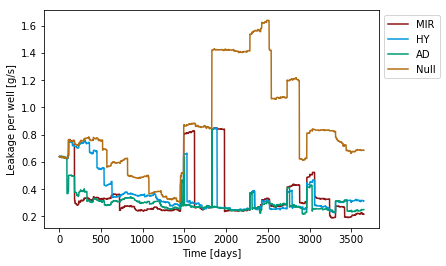

realization001.p


In [23]:
lastfile = sorted([f for f in os.listdir("Results") if "realization" in f])[-1]
time_series("Results/"+lastfile)
print(lastfile)

In [24]:
lastfile = sorted([f for f in os.listdir("Results") if "realization" in f])[-1]

In [25]:
lastfile

'realization001.p'